# WEEK 3 PROJECT: REGRESSION

AIM: The aim of the present project is to build and train a regression model on the Capital Bike Share (Washington, D.C.) Kaggle data set, in order to predict demand for bicycle rentals at any given hour, based on time and weather.

METHODS 1: test the goodness of variables as: [holiday, workingday,	temp, humidity, windspeed, morning, afternoon, evening, night] compared linear regression model with polinomial features and 3 types of regularization (Ridge, Lasso and ElasticNet) in predicting count (number of bike rented).  

In [6]:
import pandas as pd # to import data
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data vsualization
import numpy as np

from sklearn.preprocessing import StandardScaler

In [244]:
df = pd.read_csv("train.csv")

In [ ]:
df.info()

In [245]:
df.drop(['casual','registered'], axis=1, inplace=True) # DROP casual and registered (predictor for our y)

In [331]:
correlation=df.corr()
correlation['count'] #.sort()

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
count         1.000000
Name: count, dtype: float64

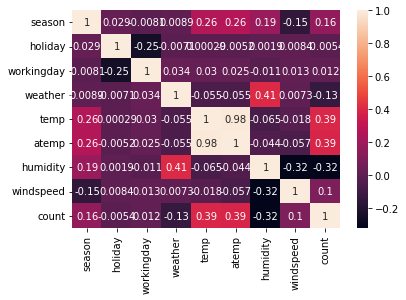

In [44]:
dataplot = sns.heatmap(df.corr(), annot=True)

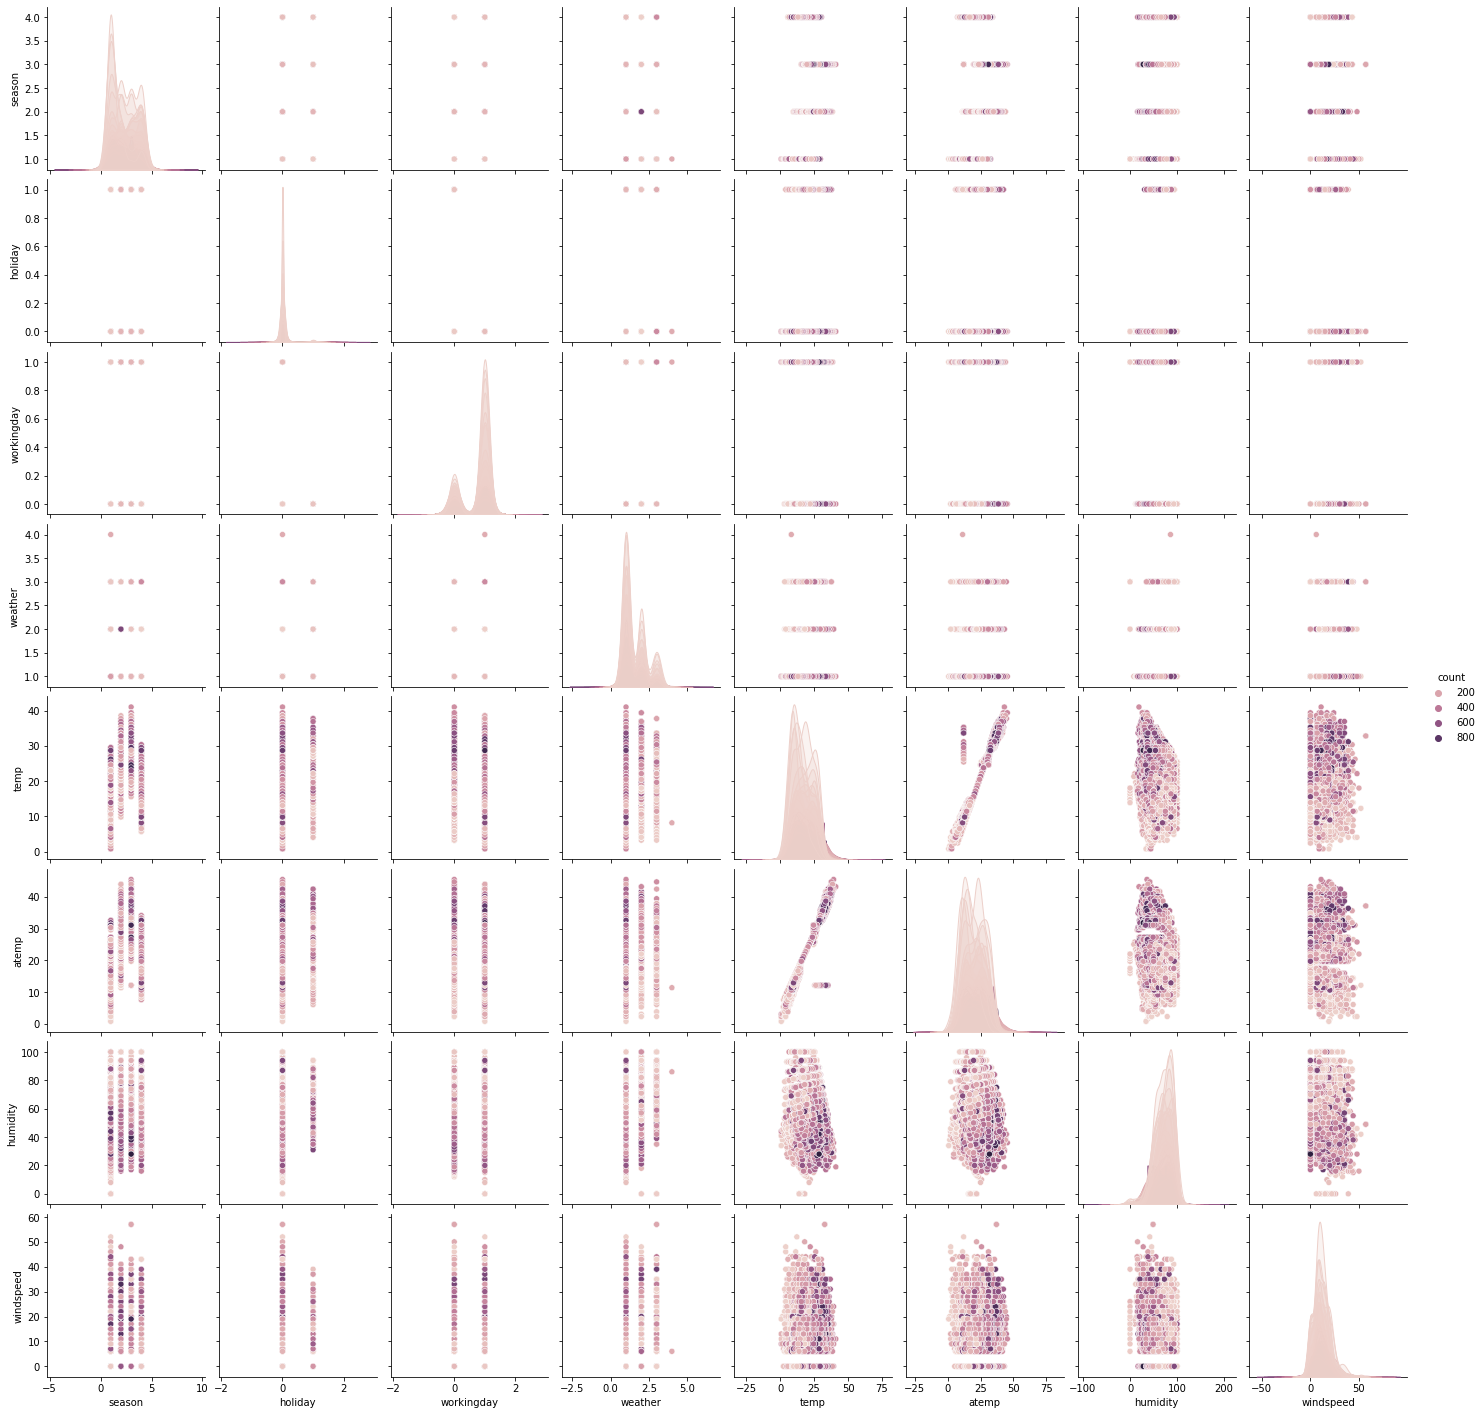

In [98]:
sns.pairplot(data=df, hue='count')

Identify X and Y

In [349]:
X= df.drop(['count'], axis=1) 
y = df["count"]

Check time, and try to see if there are hours in which there is more bike rental

In [350]:
X['datetime']=pd.to_datetime(X['datetime']) # make the index in format of dateTime
X['hour']=X['datetime'].dt.hour

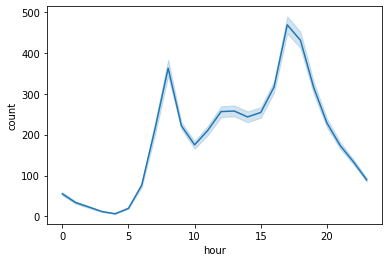

In [205]:
sns.lineplot(data=df, x=df['hour'], y=df['count'])

In [172]:
from sklearn.preprocessing import KBinsDiscretizer 

In [223]:
#binning=KBinsDiscretizer(n_bins=5, strategy='uniform')
#Xt = binning.fit_transform(df[['hour']]) 
#Xt.bin_edges_

In [211]:
new_df= df.copy() # deep copy of the df
#new_df[['night', 'morning','afternoon','evening','night']]=Xt
#new_df

new_df=df.assign(night = Xt[:,0])
new_df=df.assign(morning = Xt[:,0])
new_df=df.assign(afternoon = Xt[:,0])
new_df=df.assign(evening= Xt[:,0])

In [128]:
# RUSH and NO-RUSH
#df.loc[df['hour']<=9 & df['hour']<=7]

morning_rush=df.loc[np.logical_and(df['hour']<=9, df['hour']<=7)]
afternoon_rush= df.loc[np.logical_and(df['hour']<=19, df['hour']<=16)]
morning_rush.shape, afternoon_rush.shape
rush=np.concatenate((morning_rush, afternoon_rush), axis=0)

In [191]:
#rush=pd.DataFrame(rush)
#df.loc[rush['0']==df['datetime'], 'rush']=1 
#rush[0]==df['datetime']

In [228]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'hour'],
      dtype='object')

In [351]:
kbins = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='quantile')
binnedX= kbins.fit_transform(X[['hour']])

In [352]:
labels={'night','morning','afternoon','evening','late'}
df_bins = pd.DataFrame(binnedX, columns=labels)
df_bins

,morning,afternoon,evening,late,night
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
10881,0.0,0.0,0.0,0.0,1.0
10882,0.0,0.0,0.0,0.0,1.0
10883,0.0,0.0,0.0,0.0,1.0
10884,0.0,0.0,0.0,0.0,1.0


In [353]:
df_concat = pd.concat([X, df_bins], axis=1)

In [354]:
df_concat

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,morning,afternoon,evening,late,night
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,0,1.0,0.0,0.0,0.0,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,1,1.0,0.0,0.0,0.0,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,1.0,0.0,0.0,0.0,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,1.0,0.0,0.0,0.0,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,19,0.0,0.0,0.0,0.0,1.0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,20,0.0,0.0,0.0,0.0,1.0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,21,0.0,0.0,0.0,0.0,1.0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,22,0.0,0.0,0.0,0.0,1.0


## Feature engeneering

In [ ]:
df.isna().sum() # Check if there are Nans

One Hot Encoder (for season and weather)

In [355]:
df_concat= df_concat.merge(pd.get_dummies(df_concat['season'], drop_first=True), left_index=True, right_index=True) #OneHotEncoder for season
df_concat = df_concat.rename({2:"season2", 3:"season3", 4:"season4"}, axis='columns')

In [356]:
df_concat= df_concat.merge(pd.get_dummies(df_concat['weather'], drop_first=True), left_index=True, right_index=True) #OneHotEncoder for weather
df_concat= df_concat.rename({2:"weather2", 3:"weather3", 4:"weather4"}, axis='columns')

In [357]:
df_concat.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'hour', 'morning', 'afternoon',
       'evening', 'late', 'night', 'season2', 'season3', 'season4', 'weather2',
       'weather3', 'weather4'],
      dtype='object')

Extract the hours and keep them as h

One hot encoder for hour

In [49]:
#X= X.merge(pd.get_dummies(X['hour'], drop_first=True), left_index=True, right_index=True)
#X.drop(['datetime'], axis=1, inplace=True) 

Scaling

In [358]:
# scaling
std_scaler = StandardScaler()
scaled_values=std_scaler.fit_transform(df_concat[['temp', 'atemp','humidity','windspeed']])

In [263]:
scaled_values.shape #

(10886, 4)

In [391]:
new_df= df_concat.copy() # deep copy of the df
new_df[['temp', 'atemp','humidity','windspeed']]=scaled_values


In [270]:
new_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'hour', 'morning', 'afternoon',
       'evening', 'late', 'night'],
      dtype='object')

In [370]:
X=new_df.drop(['datetime','season','weather','temp','hour','late'], axis=1)

Split data in train and test datasets

In [273]:
from sklearn.model_selection import train_test_split

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True) 

In [372]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 15), (2178, 15), (8708,), (2178,))

## MODELS! 

In [276]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics

from sklearn import linear_model


In [277]:
# customer scorer

def rmsle(y, ypred):
    ypred[ypred<0]=0
    return metrics.mean_squared_log_error(y, ypred)**0.5


rmsle_loss = metrics.make_scorer(rmsle, greater_is_better=False)

Polinomial

In [373]:
poly=PolynomialFeatures(degree=3) # add polinomial features
X_poly=poly.fit_transform(X_train)

In [160]:
poly.get_params()

{'degree': 3, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

## REGULARIZATION

RIDGE

In [382]:
ridge= Ridge()
paramas={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(
            estimator= ridge, # the model!
            param_grid= paramas, # hyperparameters to compare
            cv=5, # folds
            return_train_score=True,
            scoring= rmsle_loss, # negative because sklearn tries to maximize score!
            n_jobs=-1, # how many cores to use on your computer, -1 uses all
)
grid_ridge.fit(X_poly, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(rmsle, greater_is_better=False), verbose=0)

In [383]:
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)

{'alpha': 100}
-1.05759767699502


LASSO

In [295]:
lasso= Lasso()
paramas={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_lasso = GridSearchCV(
            estimator= lasso, # the model!
            param_grid= paramas, # hyperparameters to compare
            cv=5, # folds
            return_train_score=True,
            scoring= rmsle_loss, # negative because sklearn tries to maximize score!
            n_jobs=-1, # how many cores to use on your computer, -1 uses all
)
grid_lasso.fit(X_poly, y_train)
print(grid_lasso.best_params_)
print(grid_lasso.best_score_)

{'alpha': 0.01}
-1.025708871666272


C:\Users\pallotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45779.38433261216, tolerance: 28280.318349839228
  positive)


ELASTIC NET

In [296]:
elastic = ElasticNet(alpha=1, l1_ratio=.5)
paramas={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_elastic = GridSearchCV(
            estimator= lasso, # the model!
            param_grid= paramas, # hyperparameters to compare
            cv=5, # folds
            return_train_score=True,
            scoring= rmsle_loss, # negative because sklearn tries to maximize score!
            n_jobs=-1, # how many cores to use on your computer, -1 uses all
)
grid_elastic.fit(X_poly, y_train)
print(grid_elastic.best_params_)
print(grid_elastic.best_score_)

{'alpha': 0.01}
-1.025708871666272


C:\Users\pallotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45779.38433261216, tolerance: 28280.318349839228
  positive)


RESULTS:['datetime','season','weather','temp','hour','late'] produce only a very avarage model for the DC Bike Share dataset
    

## Part2
METHODS 2: test the goodness of variables as: [atemp, humidity] compared linear regression model with polinomial features and 3 types of regularization (Ridge, Lasso and ElasticNet) in predicting count (number of bike rented).  

In [332]:
correlation['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
count         1.000000
Name: count, dtype: float64

In [360]:
new_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'hour', 'morning', 'afternoon',
       'evening', 'late', 'night', 'season2', 'season3', 'season4', 'weather2',
       'weather3', 'weather4'],
      dtype='object')

In [365]:
X=new_df[['humidity','temp']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True) 

In [366]:
poly=PolynomialFeatures(degree=3, interaction_only=True) # add polinomial features
X_poly=poly.fit_transform(X_train)

In [367]:
#Ridge
ridge= Ridge()
paramas={'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(
            estimator= ridge, # the model!
            param_grid= paramas, # hyperparameters to compare
            cv=5, # folds
            return_train_score=True,
            scoring= rmsle_loss, # negative because sklearn tries to maximize score!
            n_jobs=-1, # how many cores to use on your computer, -1 uses all
)
grid_ridge.fit(X_poly, y_train)
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)

{'alpha': 10}
-1.3238793657146546


In [368]:
#lasso
lasso= Lasso()
paramas={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_lasso = GridSearchCV(
            estimator= lasso, # the model!
            param_grid= paramas, # hyperparameters to compare
            cv=5, # folds
            return_train_score=True,
            scoring= rmsle_loss, # negative because sklearn tries to maximize score!
            n_jobs=-1, # how many cores to use on your computer, -1 uses all
)
grid_lasso.fit(X_poly, y_train)
print(grid_lasso.best_params_)
print(grid_lasso.best_score_)

{'alpha': 0.01}
-1.326248119647537


In [369]:
#elastic net
elastic = ElasticNet(alpha=1, l1_ratio=.5)
paramas={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_elastic = GridSearchCV(
            estimator= lasso, # the model!
            param_grid= paramas, # hyperparameters to compare
            cv=5, # folds
            return_train_score=True,
            scoring= rmsle_loss, # negative because sklearn tries to maximize score!
            n_jobs=-1, # how many cores to use on your computer, -1 uses all
)
grid_elastic.fit(X_poly, y_train)
print(grid_elastic.best_params_)
print(grid_elastic.best_score_)

{'alpha': 0.01}
-1.326248119647537


## PART 3: building a best_score function that return best score for Ridge, lasso and Elastic Net, given whatever set of variables

In [418]:
def best_score(X, y, array):
    X=new_df[array]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)
    
    poly=PolynomialFeatures(degree=5, interaction_only=True) # add polinomial features
    X_poly=poly.fit_transform(X_train)
    
    #Ridge
    ridge= Ridge()
    paramas={'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}

    grid_ridge = GridSearchCV(
                estimator= ridge, # the model!
                param_grid= paramas, # hyperparameters to compare
                cv=5, # folds
                return_train_score=True,
                scoring= rmsle_loss, # negative because sklearn tries to maximize score!
                n_jobs=-1, # how many cores to use on your computer, -1 uses all
    )
    grid_ridge.fit(X_poly, y_train)
    print('Ridge best params:',grid_ridge.best_params_)
    print('Ridge best score:',grid_ridge.best_score_)
    
    #lasso
    lasso= Lasso()
    paramas={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

    grid_lasso = GridSearchCV(
                estimator= lasso, # the model!
                param_grid= paramas, # hyperparameters to compare
                cv=5, # folds
                return_train_score=True,
                scoring= rmsle_loss, # negative because sklearn tries to maximize score!
                n_jobs=-1, # how many cores to use on your computer, -1 uses all
    )
    grid_lasso.fit(X_poly, y_train)
    print('Lasso best params:',grid_lasso.best_params_)
    print('Lasso best score:',grid_lasso.best_score_)
    
    #elastic net
    elastic = ElasticNet(alpha=1, l1_ratio=.5)
    paramas={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

    grid_elastic = GridSearchCV(
                estimator= lasso, # the model!
                param_grid= paramas, # hyperparameters to compare
                cv=5, # folds
                return_train_score=True,
                scoring= rmsle_loss, # negative because sklearn tries to maximize score!
                n_jobs=-1, # how many cores to use on your computer, -1 uses all
    )
    grid_elastic.fit(X_poly, y_train)
    print('ElasticNet best params:', grid_elastic.best_params_)
    print('ElasticNet best score:',grid_elastic.best_score_)
    
    return 

In [406]:
correlation['count'].abs()

season        0.163439
holiday       0.005393
workingday    0.011594
weather       0.128655
temp          0.394454
atemp         0.389784
humidity      0.317371
windspeed     0.101369
count         1.000000
Name: count, dtype: float64

In [420]:
best_score(X,y, ['humidity','temp', 'windspeed'])

Ridge best params: {'alpha': 0.001}
Ridge best score: -1.3652845600320576
Lasso best params: {'alpha': 0.0001}
Lasso best score: -1.3652849442867654
ElasticNet best params: {'alpha': 0.0001}
ElasticNet best score: -1.3652849442867654


RESULTS: the function best_score allow us to compare the best scores for 3 different linear models (ridge, lasso and ElasticNet), by returning the best paramethers from the grid search and the best score.

TO DO (over the stayhome- weekend): A. use pipeline to make the workflow more readable;
                                    B. tring better bins for hours (ex: rush and no-rush hours)